In [1]:
import tensorflow as tf
from tensorflow import keras

In [3]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 4s 1us/step


In [4]:
X_train_full.shape

(60000, 28, 28)

In [5]:
X_train_full.dtype

dtype('uint8')

In [6]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [8]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
"Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [9]:
class_names[y_train[0]]

'Coat'

In [12]:
# Building the neural netowrk with 2 hidden layers

In [13]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266610 (1.02 MB)
Trainable params: 266610 (1.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [15]:
model.layers

In [17]:
model.layers[1].name

'dense'

In [24]:
model.get_layer('dense').name

'dense'

In [31]:
hidden1 =model.get_layer('dense')

In [32]:
weights, biases = hidden1.get_weights()

In [33]:
weights

array([[-0.01719084,  0.05324571,  0.01966245, ..., -0.00534103,
         0.02157038, -0.05013244],
       [-0.00259556, -0.01189642, -0.03764345, ..., -0.05457695,
         0.07061467,  0.06045887],
       [ 0.05579533, -0.01914285,  0.04410014, ...,  0.05191398,
        -0.00366982, -0.07189301],
       ...,
       [ 0.03197303,  0.04891346,  0.06211281, ...,  0.02322374,
        -0.07072268,  0.04225687],
       [-0.02885535, -0.06283897,  0.01451293, ..., -0.04501121,
        -0.0030774 ,  0.02756307],
       [ 0.06101346,  0.00867897,  0.00406334, ...,  0.01766399,
        -0.0165582 , -0.00472852]], dtype=float32)

In [34]:
weights.shape

(784, 300)

In [35]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [36]:
biases.shape

(300,)

In [37]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [38]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.7316 - accuracy: 0.7610 - val_loss: 0.5087 - val_accuracy: 0.8280
Epoch 2/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.4870 - accuracy: 0.8305 - val_loss: 0.4653 - val_accuracy: 0.8424
Epoch 3/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4414 - accuracy: 0.8440 - val_loss: 0.4396 - val_accuracy: 0.8484
Epoch 4/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4138 - accuracy: 0.8539 - val_loss: 0.4013 - val_accuracy: 0.8618
Epoch 5/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3936 - accuracy: 0.8613 - val_loss: 0.3755 - val_accuracy: 0.8698
Epoch 6/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3781 - accuracy: 0.8668 - val_loss: 0.3693 - val_accuracy: 0.8722
Epoch 7/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3642 - accuracy: 0.8709 - val_loss: 0.3599 - val_accuracy:

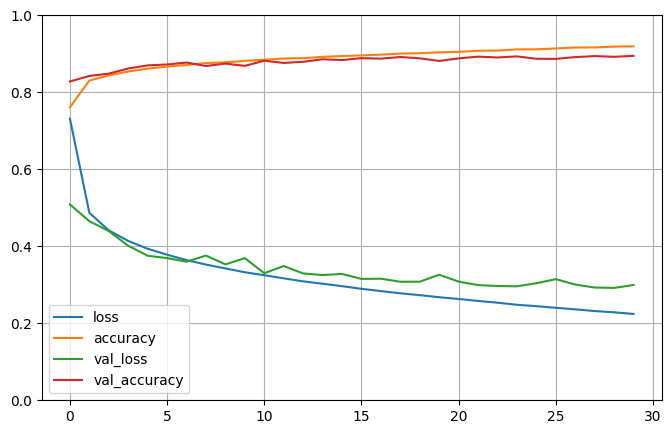

In [41]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [42]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 59.8574 - accuracy: 0.8536


[59.85736083984375, 0.853600025177002]

In [43]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 [==============================] - 0s 177ms/step


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [45]:
import numpy as np

y_pred = np.argmax(model.predict(X_new), axis=-1)  # Apply argmax along last axis
y_pred

1/1 [==============================] - 0s 51ms/step


array([9, 2, 1], dtype=int64)

In [46]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [47]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)